In [233]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
Data = pd.read_csv("Part2 - Data1.csv")
Data1 = pd.read_csv("Part2 -Data2.csv")

In [8]:
Data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [65]:
Data.shape

(5000, 8)

In [66]:
Data1.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [67]:
Data1.shape

(5000, 7)

In [68]:
data_comb = pd.merge(Data, Data1, left_index=True, right_index=True)

In [82]:
data_comb.head()

,ID_x,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,ID_y,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,2,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,3,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,4,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,5,0,0,0,0,1,NaN


In [ ]:
#----------2. Data cleansing---------

In [83]:
final_data= data_comb.drop(['ID_y','ID_x'], axis = 1) 
final_data

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [84]:
final_data.shape

(5000, 13)

In [85]:
final_data.dtypes

Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [86]:
final_data.isnull().sum()

Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [87]:
# I have 2 options when it comes to replacing NaN values - 1.Mean or 2. Median. I chose median as the dataset has outputs only in 0 or 1.
#Choosing mean would give me decimals. 

final_data['LoanOnCard'].fillna(value=final_data['LoanOnCard'].median(), inplace=True)
final_data

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0,0.0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0,0.0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0.0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0.0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [88]:
final_data.isnull().sum()

Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [104]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   CustomerSince        5000 non-null   int64  
 2   HighestSpend         5000 non-null   int64  
 3   ZipCode              5000 non-null   int64  
 4   HiddenScore          5000 non-null   int64  
 5   MonthlyAverageSpend  5000 non-null   float64
 6   Level                5000 non-null   int64  
 7   Mortgage             5000 non-null   int64  
 8   Security             5000 non-null   int64  
 9   FixedDepositAccount  5000 non-null   int64  
 10  InternetBanking      5000 non-null   int64  
 11  CreditCard           5000 non-null   int64  
 12  LoanOnCard           5000 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 507.9 KB


In [ ]:
#----------3. Data analysis & visualisation:---------

In [103]:
final_data.describe()

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.294621
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


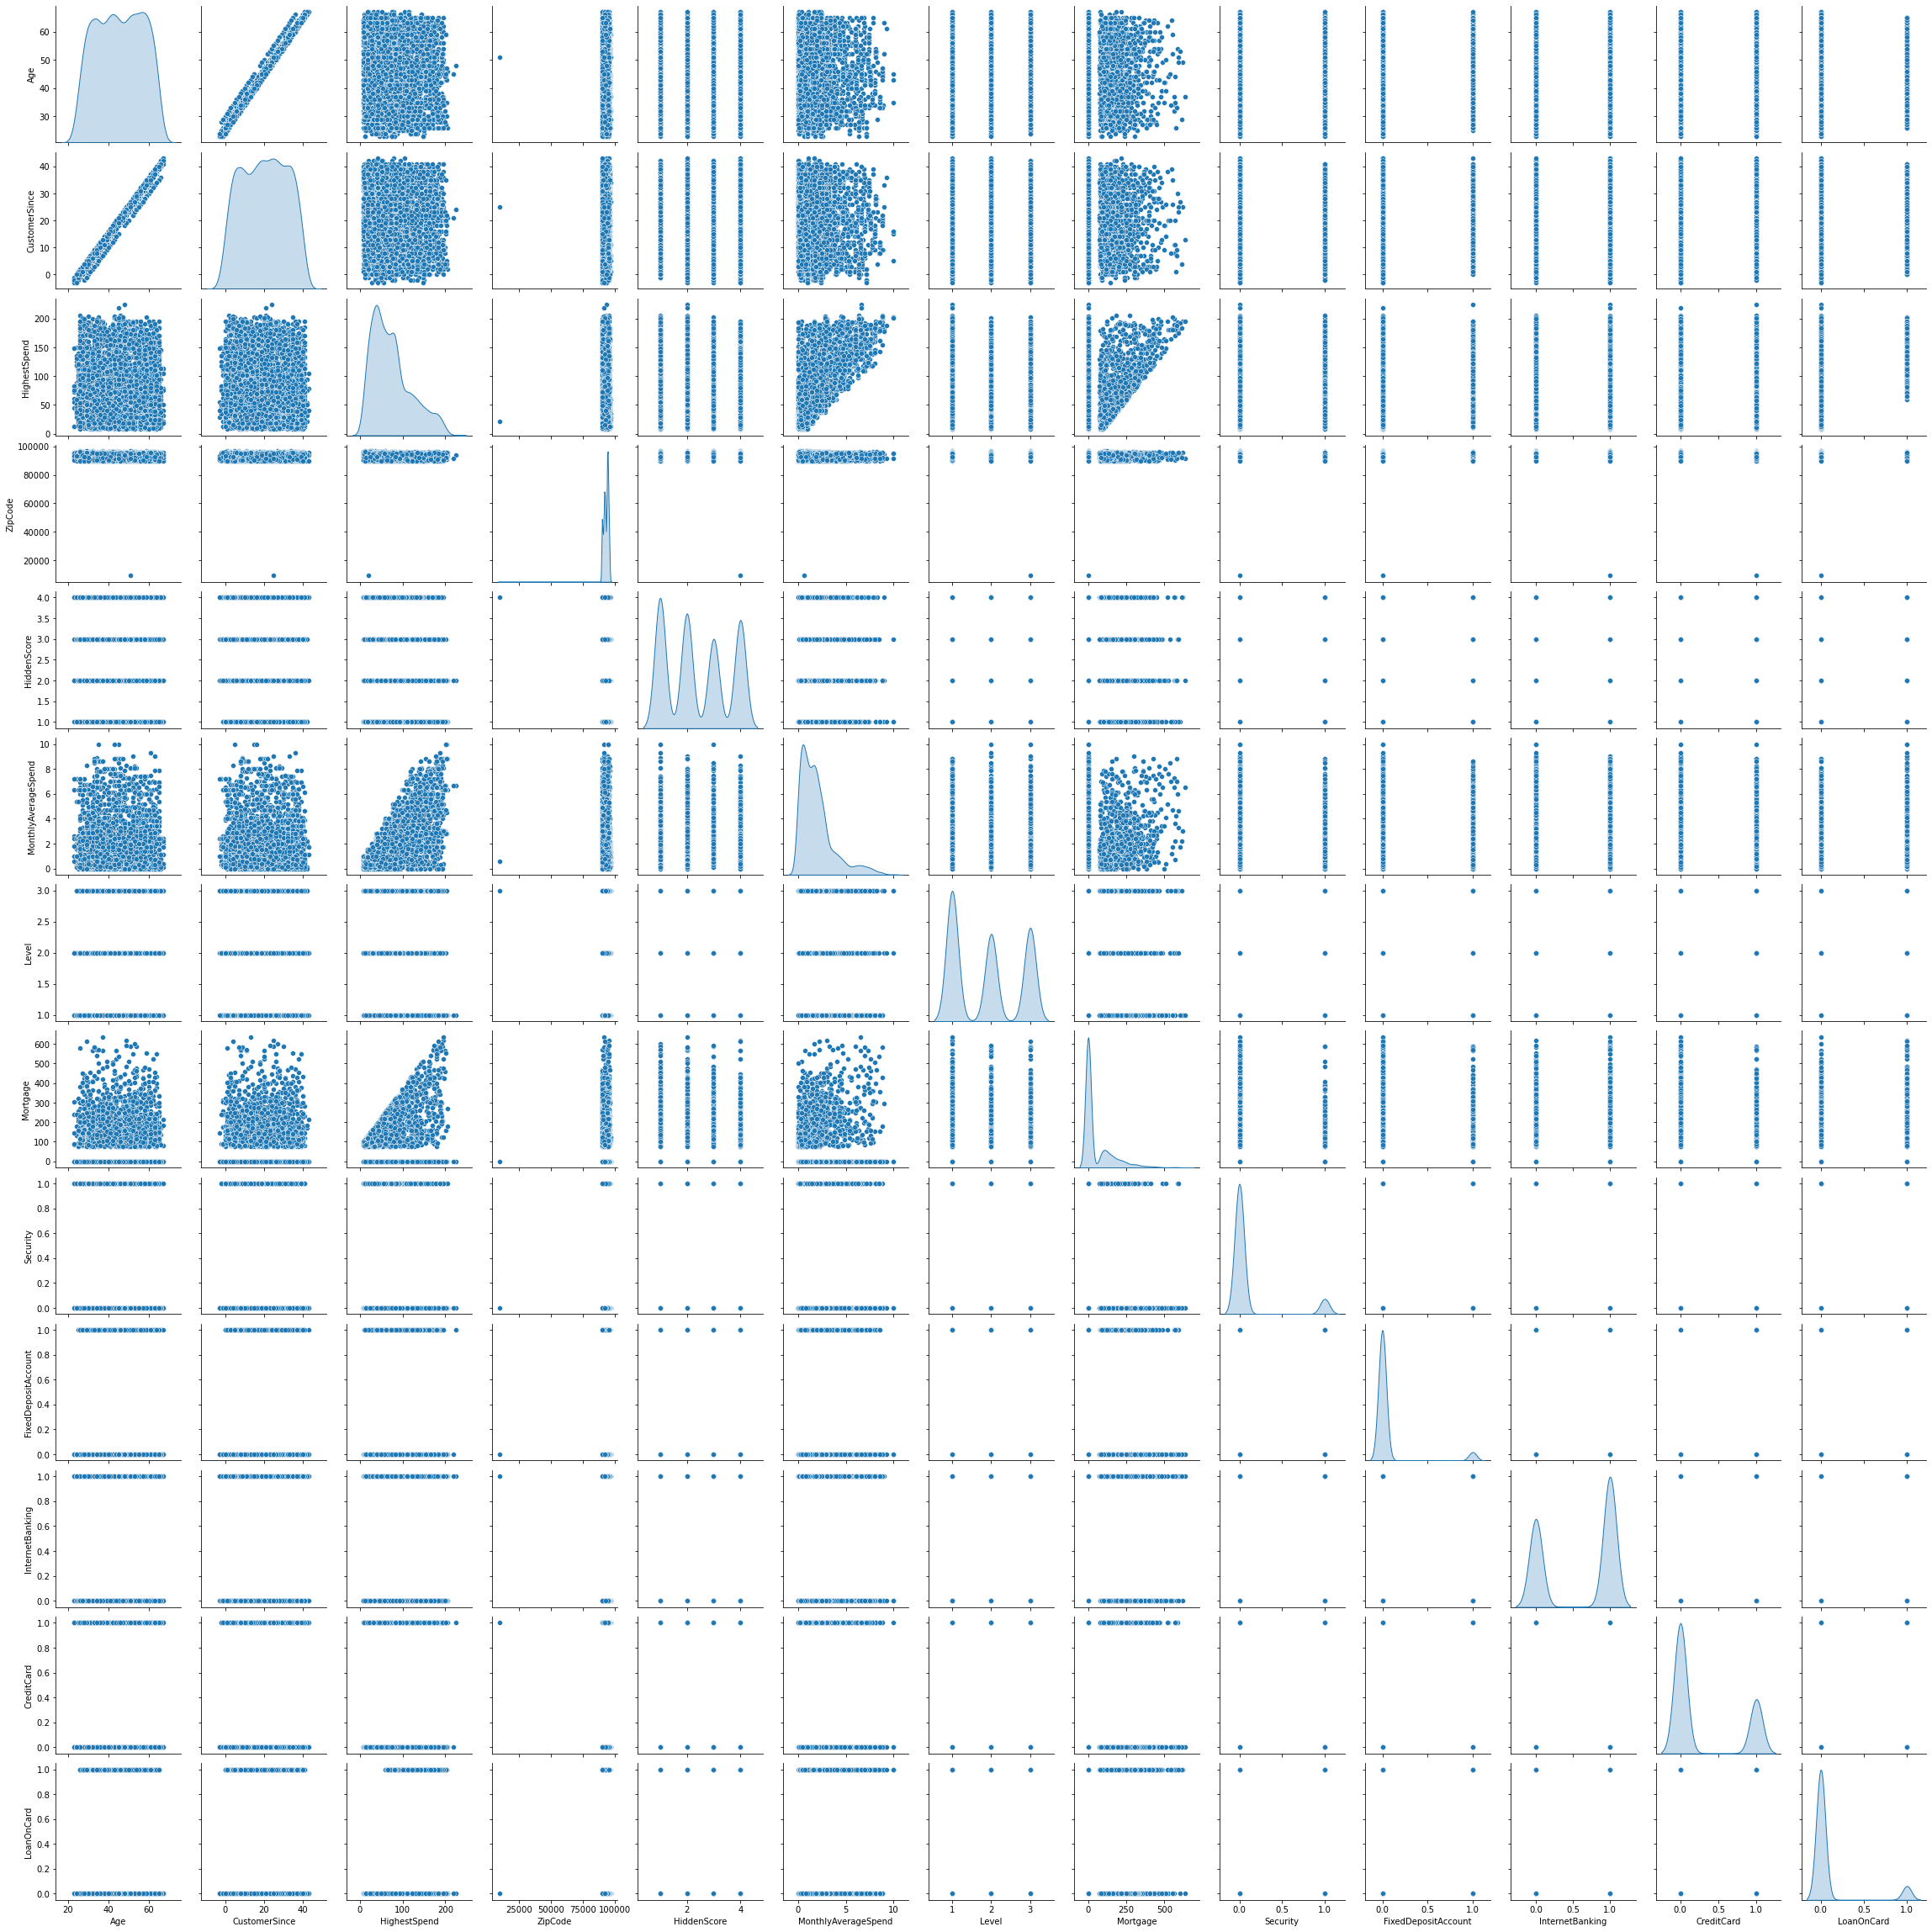

In [93]:
sns.pairplot(final_data, diag_kind='kde');

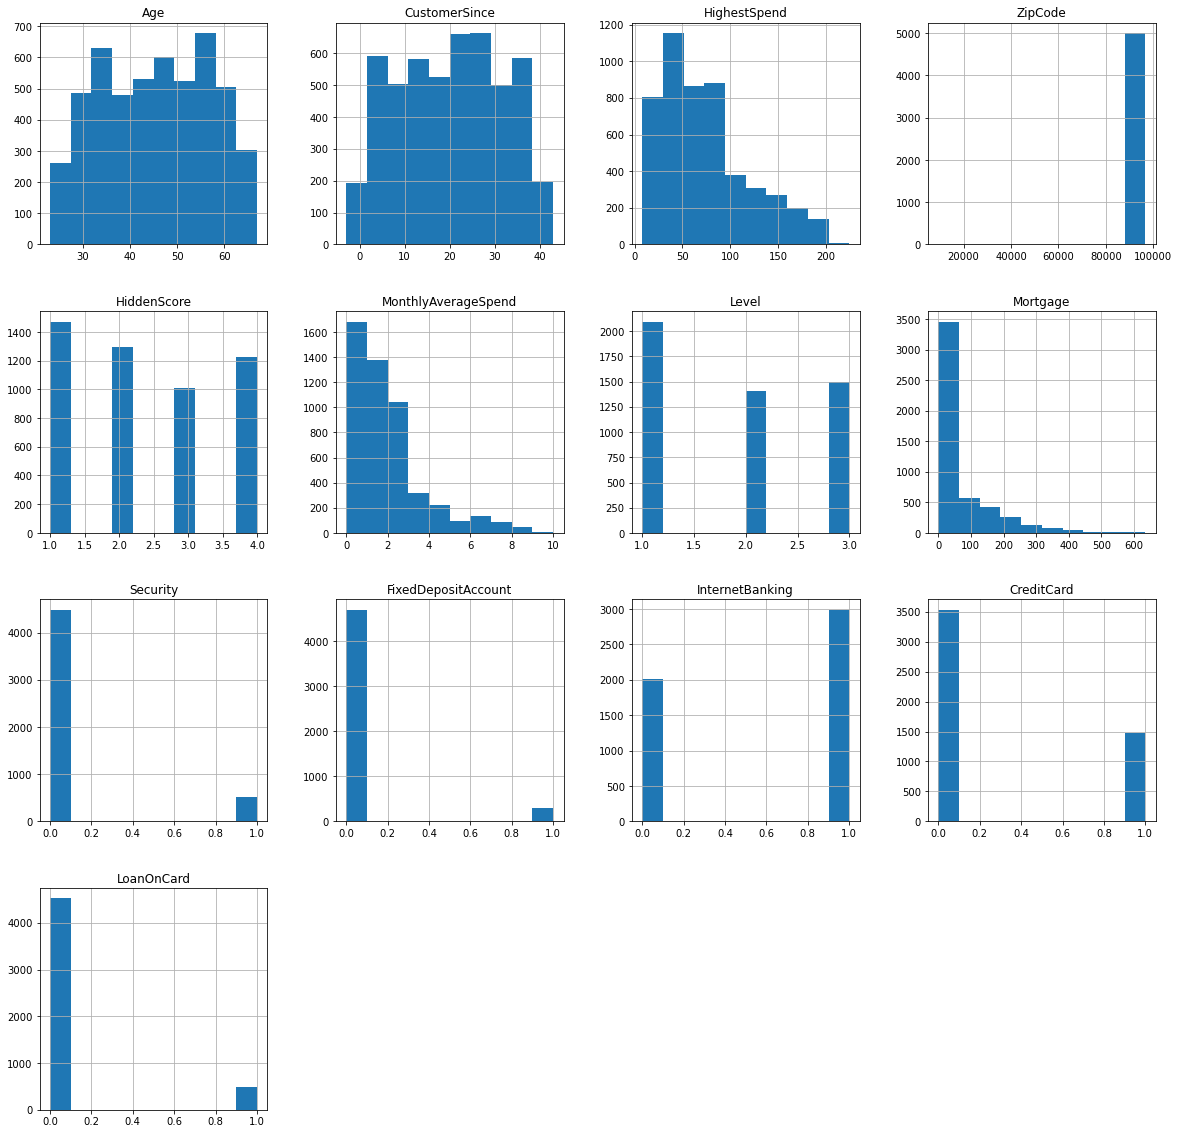

In [95]:
final_data.hist(figsize=(20,20));

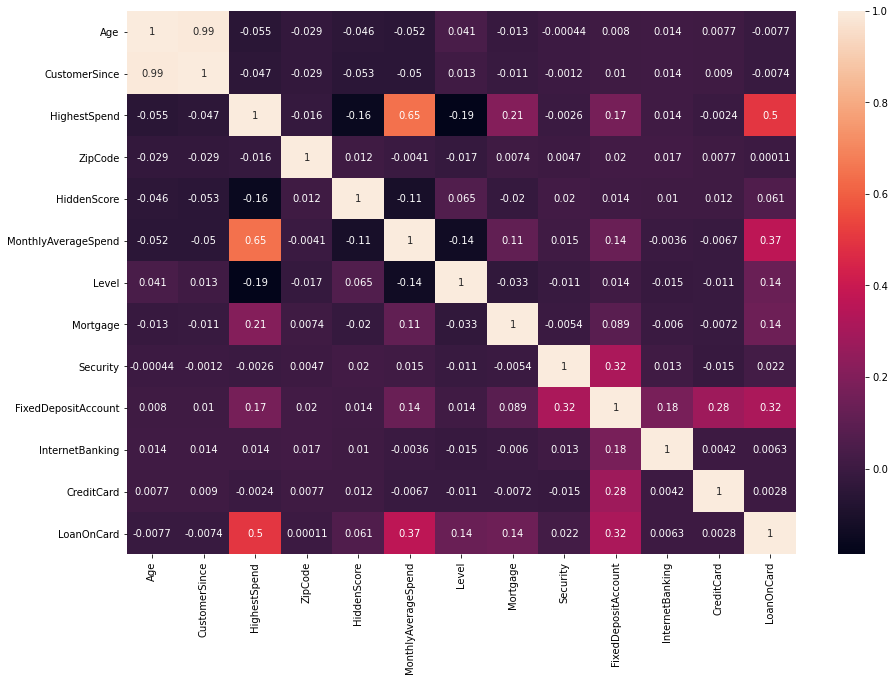

In [102]:
plt.figure(figsize=(15,10))
sns.heatmap(final_data.corr(), annot=True);

In [205]:
#Notice that Age and customer parameters are closely related 

In [207]:
final_data['LoanOnCard'].value_counts() #480 people out of 5000 have loan

0.0    4520
1.0     480
Name: LoanOnCard, dtype: int64

In [213]:
final_data.plot.pie(autopct="%.1f%%", subplots=True)

array([<AxesSubplot:ylabel='Age'>, <AxesSubplot:ylabel='CustomerSince'>,
       <AxesSubplot:ylabel='HighestSpend'>,
       <AxesSubplot:ylabel='ZipCode'>, <AxesSubplot:ylabel='HiddenScore'>,
       <AxesSubplot:ylabel='MonthlyAverageSpend'>,
       <AxesSubplot:ylabel='Level'>, <AxesSubplot:ylabel='Mortgage'>,
       <AxesSubplot:ylabel='Security'>,
       <AxesSubplot:ylabel='FixedDepositAccount'>,
       <AxesSubplot:ylabel='InternetBanking'>,
       <AxesSubplot:ylabel='CreditCard'>,
       <AxesSubplot:ylabel='LoanOnCard'>], dtype=object)

Error in callback <function flush_figures at 0x7fbd21ca30d0> (for post_execute):


KeyboardInterrupt: 

In [109]:
final_data['Age'].value_counts() #Checking the distribution of ages

35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='count'>

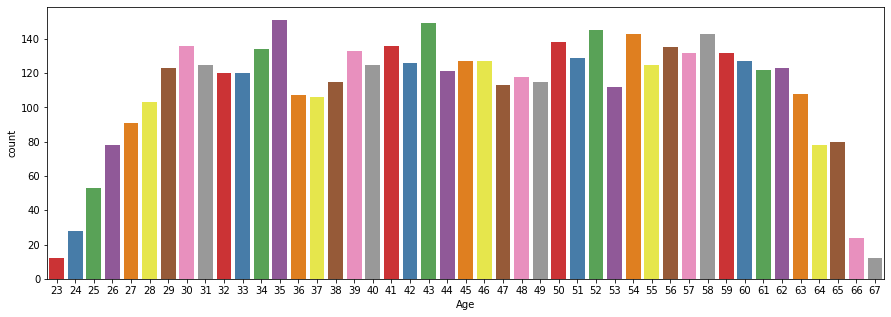

In [130]:
plt.figure(figsize=(15,5))
sns.countplot(data=final_data, x='Age', palette="Set1")

<AxesSubplot:xlabel='CustomerSince', ylabel='count'>

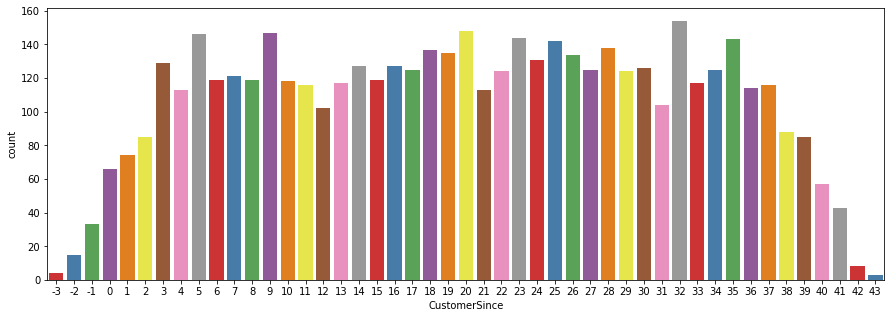

In [132]:
plt.figure(figsize=(15,5))
sns.countplot(data=final_data, x='CustomerSince', palette="Set1")

In [143]:
# Notice the customer since in NEGETIVE. Assuming this is an error. The goal now is to convert it to positive numbers.
#We can take aboslute value of the same.

In [141]:
final_data['CustomerSince']=final_data['CustomerSince'].apply(abs)

<AxesSubplot:xlabel='CustomerSince', ylabel='count'>

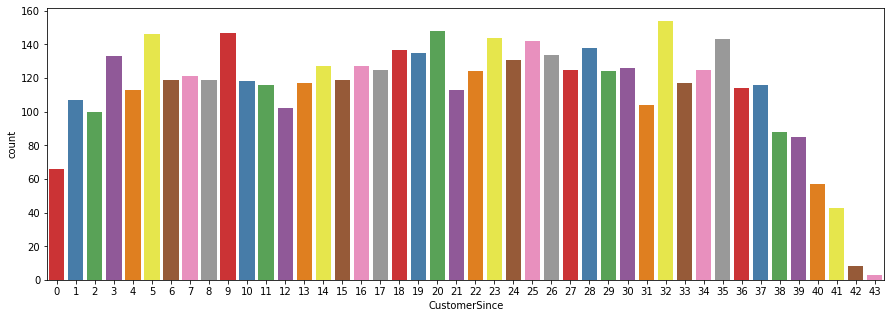

In [144]:
plt.figure(figsize=(15,5))
sns.countplot(data=final_data, x='CustomerSince', palette="Set1")

<AxesSubplot:xlabel='Age', ylabel='Count'>

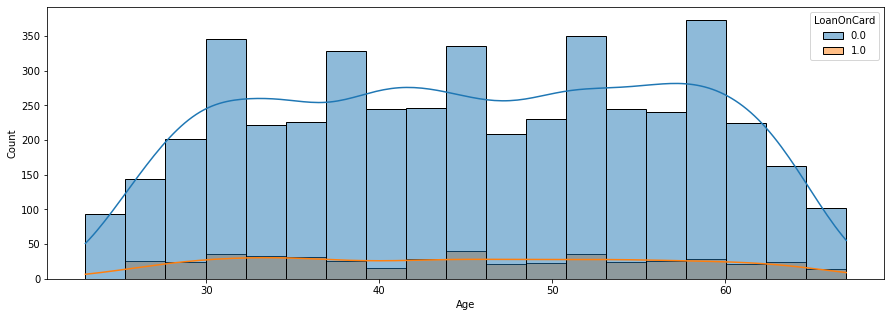

In [186]:
plt.figure(figsize=(15,5))
sns.histplot(data=final_data, x="Age", hue='LoanOnCard', kde=True)

<AxesSubplot:xlabel='CustomerSince', ylabel='count'>

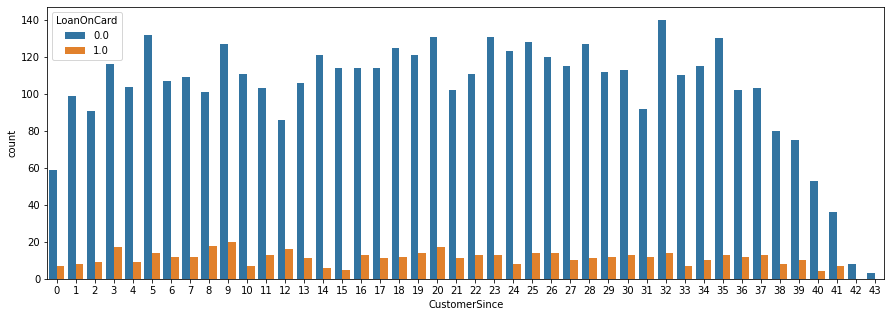

In [167]:
plt.figure(figsize=(15,5))
sns.countplot(data=final_data, x="CustomerSince", hue='LoanOnCard') 

#Customers who are 9 years old have the highest loan on card.

<AxesSubplot:xlabel='HighestSpend', ylabel='Count'>

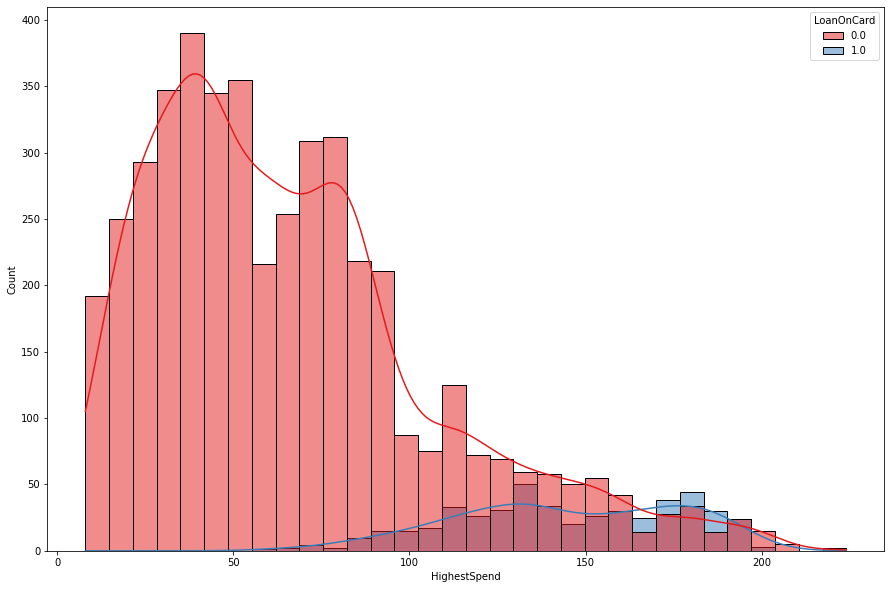

In [185]:
plt.figure(figsize=(15,10))
sns.histplot(data=final_data, x="HighestSpend", hue='LoanOnCard', kde=True, palette="Set1")

#Customers who earn below 50 do not have loan on card. More number of customers above 100 have loan on card.

<AxesSubplot:xlabel='MonthlyAverageSpend', ylabel='Count'>

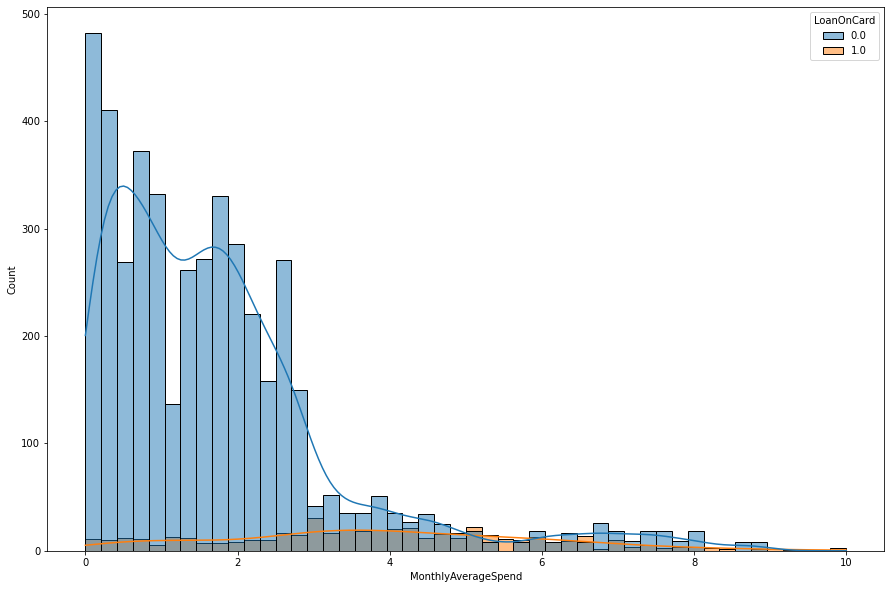

In [187]:
plt.figure(figsize=(15,10))
sns.histplot(data=final_data, x="MonthlyAverageSpend", hue='LoanOnCard', kde=True)

<AxesSubplot:xlabel='Mortgage', ylabel='Count'>

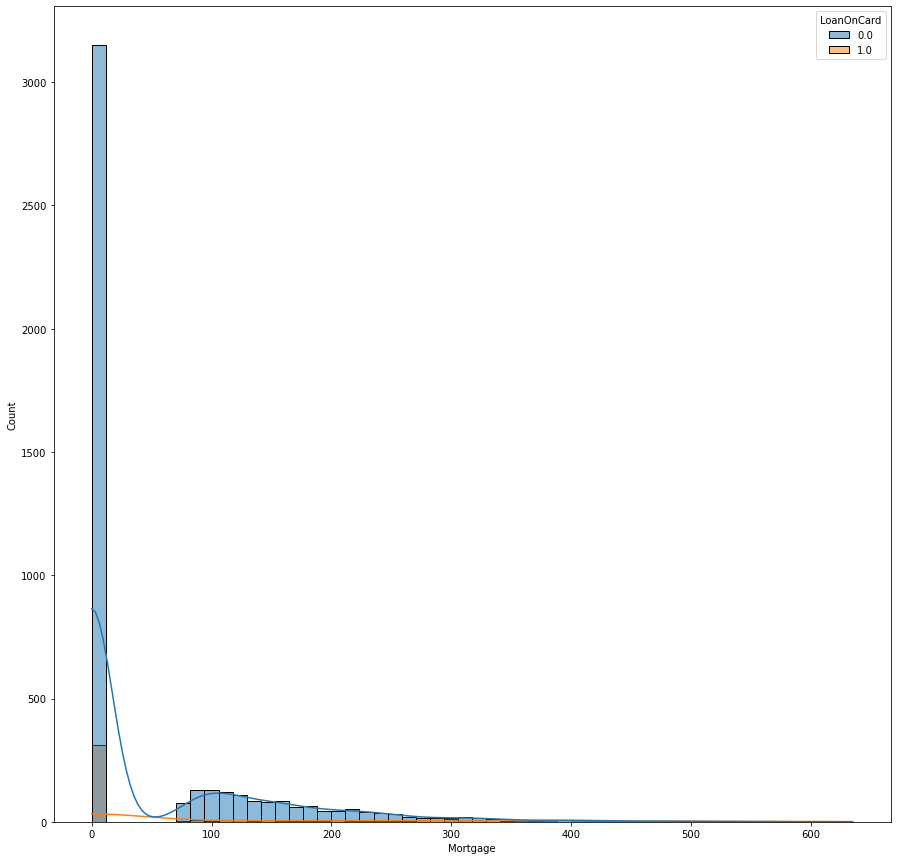

In [202]:
plt.figure(figsize=(15,15))
sns.histplot(data=final_data, x="Mortgage", hue='LoanOnCard',kde=True)

#People above 300, seem to have a higher loan on their cards. 

In [204]:
#----------4. Data pre-processing:---------

In [225]:
#Predictor Variables:
X = final_data.drop('LoanOnCard', axis=1)

#Dependent Variable:
y = final_data['LoanOnCard']

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 7 )

In [227]:
final_data.head()

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0,0.0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0,0.0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0.0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0.0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1,0.0


In [229]:
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)

In [221]:
#---------5. Model training, testing and tuning:-------

In [241]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score, classification_report

LogRegModel = LogisticRegression()
LogRegModel.fit(X_train,y_train)

y_pred = LogRegModel.predict(X_test)

acc_score_LR = accuracy_score(y_test,y_pred)

f1_score_LR = f1_score(y_test,y_pred) 

confmat_LR = confusion_matrix(y_test,y_pred)

classrep_LR = classification_report(y_test,y_pred)

print("Accuracy of model = {} %".format(acc_score_LR*100))
print("f1-score of model = {} %".format(f1_score_LR*100))
print("Confusion matrix for logistic regression : \n",confmat_LR)
print("Detailed classification report for logistic regression is: \n",classrep_LR)

Accuracy of model = 94.86666666666666 %
f1-score of model = 69.32270916334662 %
Confusion matrix for logistic regression : 
 [[1336   15]
 [  62   87]]
Detailed classification report for logistic regression is: 
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1351
         1.0       0.85      0.58      0.69       149

    accuracy                           0.95      1500
   macro avg       0.90      0.79      0.83      1500
weighted avg       0.95      0.95      0.94      1500



In [ ]:
#Accuracy is good for the model, 

#f1-score is at 69.32%

# A Precision is at 0.85 for Class 1.0 means out of all positively predicted customers who would 
#take loan on card 85% were correctly predicted.

# A recall value of 0.58 for Class 1.0 means out all the customers who will buy the loan, only 58% of them were correctly 
# predeicted by the model i.e  take loan on card. The remaining 32% of potential customers has not been captured by the model.

In [242]:
#Naives Bayes 

NBModel = GaussianNB()

NBModel.fit(X_train,y_train)

y_pred = NBModel.predict(X_test)

accuracyscore = accuracy_score(y_test,y_pred)

f1_score = f1_score(y_test,y_pred) 

confusionmat = confusion_matrix(y_test,y_pred)

classreport = classification_report(y_test,y_pred)

print("The accuracy of the model is {} %".format(accuracyscore*100))
print("The f1-score of the model is {} %".format(f1_score*100))
print("The confusion matrix for Naive Bayes classifier is: \n",confusionmat)
print("Detailed classification report for Naive Bayes classifier is: \n",classreport)

The accuracy of the model is 87.66666666666667 %
The f1-score of the model is 47.59206798866855 %
The confusion matrix for Naive Bayes classifier is: 
 [[1231  120]
 [  65   84]]
Detailed classification report for Naive Bayes classifier is: 
               precision    recall  f1-score   support

         0.0       0.95      0.91      0.93      1351
         1.0       0.41      0.56      0.48       149

    accuracy                           0.88      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.88      0.88      1500



In [ ]:
#Overall parameters for Naives Bayes model has decreased